### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from fractions import Fraction
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

2.1 Information about the data types of columns in the data frame.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.shape

(12684, 26)

In [6]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2.2 Unique values in each column of type 'object' in the data frame.

In [7]:

data.apply(lambda col: col.unique() if col.dtype == 'object' else None).dropna() 



destination                                 [No Urgent Place, Home, Work]
passanger                             [Alone, Friend(s), Kid(s), Partner]
weather                                             [Sunny, Rainy, Snowy]
time                                          [2PM, 10AM, 6PM, 7AM, 10PM]
coupon                  [Restaurant(<20), Coffee House, Carry out & Ta...
expiration                                                       [1d, 2h]
gender                                                     [Female, Male]
age                             [21, 46, 26, 31, 41, 50plus, 36, below21]
maritalStatus           [Unmarried partner, Single, Married partner, D...
education               [Some college - no degree, Bachelors degree, A...
occupation              [Unemployed, Architecture & Engineering, Stude...
income                  [$37500 - $49999, $62500 - $74999, $12500 - $2...
car                     [nan, Scooter and motorcycle, crossover, Mazda...
Bar                                   

2.3 Find missing values in the data frame

In [8]:
# Only show columns that have missing values
(lambda col: data[col].isnull().sum())(data.columns[data.isnull().any()].tolist())

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

2.4 Address problematic data

Following data attributes need to be treated:

a) passanger - convert "Kid(s)" -> "Kid" & "Friend(s)" -> Friend

b) time - convert AM/PM format to military (24-hour) time (integer).

c) expiration - convert from day to hours (integer)

d) age - normalize to integers

e) income - for each range convert the average (integer)

f) Bar/CoffeeHouse/ResturantLessThan20/Resturant20To50 - convert to integers

g) Shorten occupation strings


In [9]:
## a) passanger - convert "Kid(s)" -> "Kid" & "Friend(s)" -> Friend

data['passanger'] = data['passanger'].str.replace('(s)','')


In [10]:
## b) time - convert AM/PM format to military (24-hour) time (integer)

dict = {'2PM':14, '10AM':10, '6PM':18, '7AM':7, '10PM':22}
data.replace({'time': dict},inplace=True)


In [11]:
## c) expiration - convert from day to hours (integer)

data.replace(({'expiration': {'1d':24,'2h':2}}), inplace=True);


In [12]:
## d) age - normalize to integers

data.replace(({'age': {'50plus':51,'below21':20}}), inplace=True);
data['age'] = pd.to_numeric(data['age'])


In [13]:
## e) income - for each range convert the average (integer); used data['income'].value_counts().reset_index() to find the ranges.
## Note: Income is in thousands
dict = {'$25000 - $37499':31, '$12500 - $24999':18, '$37500 - $49999':43, '$100000 or More':100, \
        '$50000 - $62499':56, 'Less than $12500':12, '$87500 - $99999':93, '$75000 - $87499':81, '$62500 - $74999':68}
data.replace({'income': dict},inplace=True)

In [14]:
## f) Bar/CoffeeHouse/ResturantLessThan20/Resturant20To50 - convert to integers
dict = {'never':0, 'less1':1, '1~3':2, 'gt8':9, '4~8':6}
list(map(lambda col: data.replace({col:dict},inplace=True), ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']) );

In [15]:
## g) Shorten occupation strings
dict = {'Computer & Mathematical':'ComMath', 'Education&Training&Library':'EduTrainLib', 'Office & Administrative Support':'OffAdminSupp', \
        'Arts Design Entertainment Sports & Media':'ArtDesignEntSportMedia', 'Food Preparation & Serving Related':'FoodPrepServRel', \
        'Healthcare Practitioners & Technical':'HealthPractTech', 'Community & Social Services':'ComSocialSvc', \
        'Transportation & Material Moving':'TransMaterialMov', 'Architecture & Engineering':'ArchEng', 'Life Physical Social Science':'LifePhyScoSci', \
        'Construction & Extraction':'ConstExt', 'Personal Care & Service':'PerCareSvc', 'Installation Maintenance & Repair':'InstallMainRep', \
        'Production Occupations':'ProdOccup', 'Building & Grounds Cleaning & Maintenance':'BldGrdCleanMain', 'Farming Fishing & Forestry':'FarmFishForest', \
        'Sales & Related':'SaleRelated'}
data.replace({'occupation':dict},inplace=True);

In [16]:
## Check to make sure transformation has been completed successfully
data.apply(lambda col: col.unique())

destination                                 [No Urgent Place, Home, Work]
passanger                                   [Alone, Friend, Kid, Partner]
weather                                             [Sunny, Rainy, Snowy]
temperature                                                  [55, 80, 30]
time                                                  [14, 10, 18, 7, 22]
coupon                  [Restaurant(<20), Coffee House, Carry out & Ta...
expiration                                                        [24, 2]
gender                                                     [Female, Male]
age                                      [21, 46, 26, 31, 41, 51, 36, 20]
maritalStatus           [Unmarried partner, Single, Married partner, D...
has_children                                                       [1, 0]
education               [Some college - no degree, Bachelors degree, A...
occupation              [Unemployed, ArchEng, Student, EduTrainLib, He...
income                              [4

3. Decide what to do about your missing data -- drop, replace, other...

3.1 Determine the missing values in percentage per column

The strategy of addressing missing values is as follows:

a) If the percentage of missing values, per column, is >= 70%, then we will drop the entire column.

b) If the percentage of missing values, per column, is < 30%, then keep the column and evaluate.

c) For columns with missing values > 10%, the values will be filled using interpolation technique or mean or media or mode. Will depend on the data charastics. 

d) For columns with missing data <= 10%, the associated row will simply be dropped.

In [17]:
# Show the percentage of missing values per column

(lambda col: print( (data[col].isnull().mean().mul(100).round(2)) ) ) \
 (data.columns[data.isnull().any()].tolist())


car                     99.15
Bar                      0.84
CoffeeHouse              1.71
CarryAway                1.19
RestaurantLessThan20     1.02
Restaurant20To50         1.49
dtype: float64


3.2 Data treatment 

Base on the percent of missing data shown in section 3.2, The "car" column will be dropped and for columns that have missing values <= 10%, the associated rows containing missing values will be dropped.

In [18]:
data.drop('car', axis=1, inplace=True)


In [19]:
data.dropna(how='any', axis=0, inplace=True) 

3.3 Validate data is clean

In [20]:
#Make sure there are no nulls/nan
(lambda col: data[col].isnull().sum())(data.columns[data.isnull().any()].tolist())

Series([], dtype: float64)

3.5 Evaluate data post cleaning & transformation

Note: The original dataframe was 12683 rows x 26 columns 

In [21]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [22]:
#Examine data post null clean up and transformations. Expect to see no nan and the transformed attributes are either int64 or float64.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12079 non-null  object 
 1   passanger             12079 non-null  object 
 2   weather               12079 non-null  object 
 3   temperature           12079 non-null  int64  
 4   time                  12079 non-null  int64  
 5   coupon                12079 non-null  object 
 6   expiration            12079 non-null  int64  
 7   gender                12079 non-null  object 
 8   age                   12079 non-null  int64  
 9   maritalStatus         12079 non-null  object 
 10  has_children          12079 non-null  int64  
 11  education             12079 non-null  object 
 12  occupation            12079 non-null  object 
 13  income                12079 non-null  int64  
 14  Bar                   12079 non-null  float64
 15  CoffeeHouse           1

In [84]:
# Validate dataframe dimentions have changed. Note: originally the dataframe length was 12683 rows.

print ("Dimentions of cleaned dataframe: \033[1m\033[3m\033[4m" + str(data.shape)+ '\033[0m');
print ("As part of the cleaning process, number of rows are reduced by: \033[1m\033[3m\033[4m" + format(((12683 - data.shape[0])/12683),".2%")+ '\033[0m');

Dimentions of cleaned dataframe: (12079, 25)
As part of the cleaning process, number of rows are reduced by: 4.76%


4. What proportion of the total observations chose to accept the coupon? 



In [85]:
print("The total number of observers who chose to accept the coupon are: \033[1m\033[3m\033[4m" + str(data['Y'].value_counts()[1])+ '\033[0m')
print("The total number of observers who did not chose to accept the coupon are: \033[1m\033[3m\033[4m" + str(data['Y'].value_counts()[0])+ '\033[0m')
print("The portion of observers that chose to accept the coupon are: \033[1m\033[3m\033[4m" + \
      format(data['Y'].value_counts()[1] / data.shape[0],".2%")+ '\033[0m')



The total number of observers who chose to accept the coupon are: 6877
The total number of observers who did not chose to accept the coupon are: 5202
The portion of observers that chose to accept the coupon are: 56.93%


5. Use a bar plot to visualize the `coupon` column.

5.1 Offers across different types of coupons

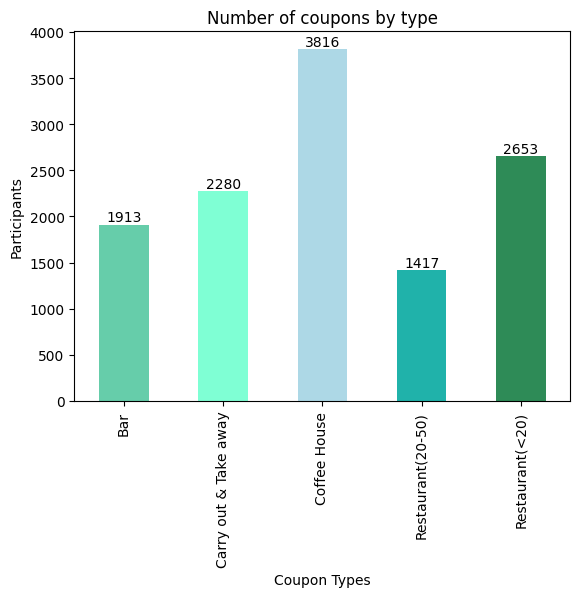

In [129]:
df = data.groupby(['coupon']).size()
ax = df.plot(kind='bar',color=['mediumaquamarine', "aquamarine", "lightblue", "lightseagreen", 'seagreen'],\
            xlabel="Coupon Types", ylabel="Participants", title="Number of coupons by type")
for container in ax.containers:
    ax.bar_label(container)

plt.savefig('images/bar_coupon_types_dist.png')


5.2 Accepted/rejected offers across different coupon types 

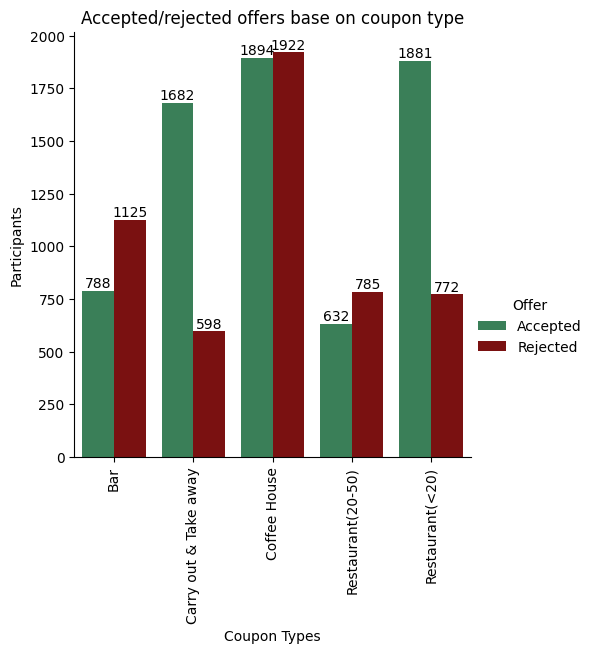

In [130]:

df = pd.merge( data[data['Y']==1].groupby(['coupon']).size().to_frame(), \
               data[data['Y']==0].groupby(['coupon']).size().to_frame(), \
                left_on='coupon', right_on='coupon', how='outer')
df.rename(columns = {'0_x':'Accepted', '0_y':'Rejected'}, inplace=True);
df.reset_index(inplace=True)
dfm = pd.melt(df, id_vars='coupon', var_name='Offer', value_name='Count')

for container in ax.containers:
    ax.bar_label(container)
grid = sns.catplot(x='coupon', y='Count', hue='Offer', data=dfm, kind='bar', \
                 height=5, aspect=1, palette=["seagreen", "darkred"])
ax = grid.axes[0, 0]
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Coupon Types") 
plt.xticks(rotation=90) 
plt.ylabel("Participants") 
plt.title('Accepted/rejected offers base on coupon type')

plt.savefig('images/bar_accept_reject_coupon_types_dist.png')

6. Use a histogram to visualize the temperature column.

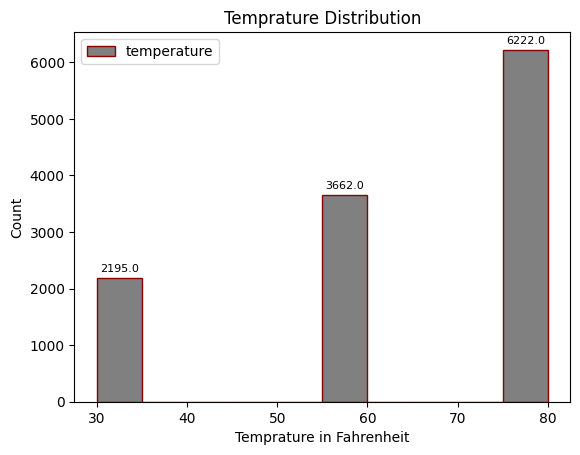

In [131]:

ax = data.plot.hist(column='temperature', color = 'gray', edgecolor='darkred')
ax.set_xlabel("Temprature in Fahrenheit")
ax.set_ylabel("Count")
ax.set_title("Temprature Distribution")
for c in ax.containers:
    labels = [f'{h:0.1f}' if (h := v.get_height()) != 0 else '' for v in c ]
    ax.bar_label(c, labels=labels, fontsize=8, padding=3)

plt.savefig('images/hist_temperature.png')


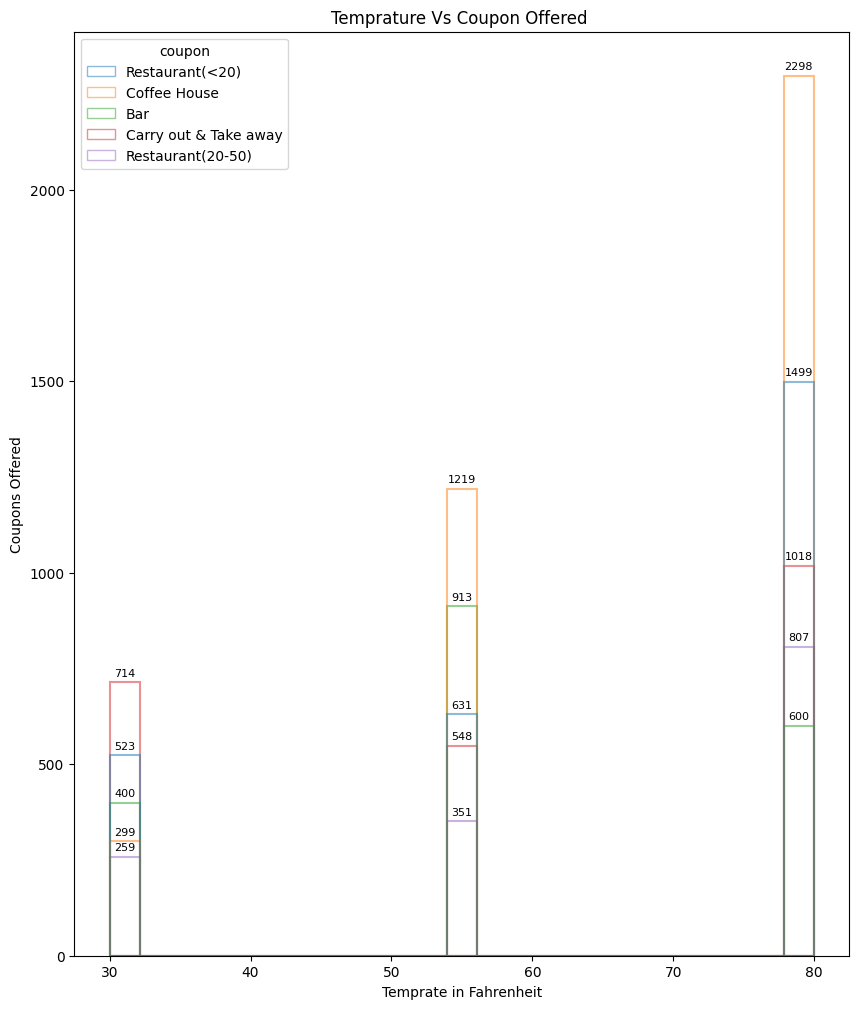

In [132]:
fig, ax = plt.subplots(figsize=(10, 12))

ax = sns.histplot(data=data, x='temperature', hue='coupon', ax=ax,  alpha=0.5,fill=False, edgecolor='lightgray')
ax.set_title("Temprature Vs Coupon Offered ")
ax.set_xlabel("Temprate in Fahrenheit")
ax.set_ylabel("Coupons Offered")
for c in ax.containers:
    labels = [f'{h:0}' if (h := v.get_height()) != 0 else '' for v in c ]
    ax.bar_label(c, labels=labels, fontsize=8, padding=3)
plt.savefig('images/hist_temperature_coupons_types.png')

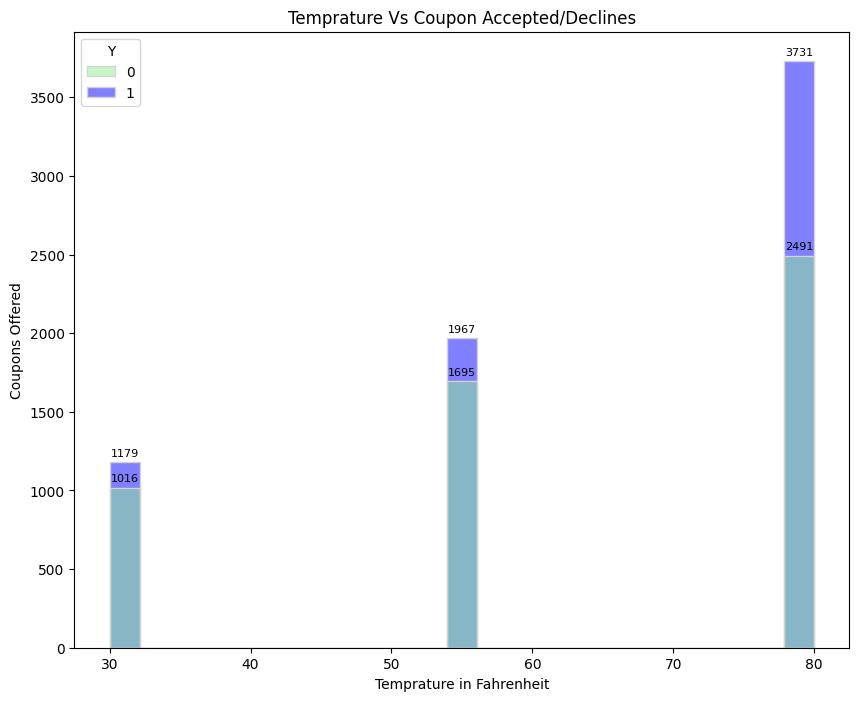

In [133]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=data, x='temperature', hue='Y', alpha=0.5,  edgecolor='lightgray', palette=["lightgreen", "blue"], ax=ax)
ax.set_title("Temprature Vs Coupon Accepted/Declines")
ax.set_xlabel("Temprature in Fahrenheit")
ax.set_ylabel("Coupons Offered")
for c in ax.containers:
    labels = [f'{h:0}' if (h := v.get_height()) != 0 else '' for v in c ]
    ax.bar_label(c, labels=labels, fontsize=8, padding=3)
plt.savefig('images/hist_temperature_accept_reject.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [30]:
bar_df = data.query("coupon == 'Bar'").copy(deep = True)


2. What proportion of bar coupons were accepted?


In [87]:
print("The portion of bar coupons that were accepted are: \033[1m\033[3m\033[4m" + format(bar_df['Y'].value_counts()[1] / data.shape[0],".2%")+ '\033[0m')


The portion of bar coupons that were accepted are: 6.52%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [121]:

# Group1 - Participents that went to a bar no more than three times, where the coupon accepted may or may not have been of type "Bar", are:
xresult = data.query('Bar <= 3.0 & Y == 1').Bar.count();

# Group2 - Participents that went to a bar more than three time are: 
yresult = data.query('Bar > 3.0 & Y == 1').Bar.count();

# The ratio between the participents who when to the bar no more than three time to the one who went more than three times 
result = xresult/yresult;

print( "Group1 = " + str(xresult) + "  Group2 = " + str(yresult) + " Sample Size = " + str(data.shape[0]))
print("\nAcceptance rate of participents that went to a bar no more than three times are: \033[1m\033[3m\033[4m\n\t" + format(xresult/data.shape[0], ".2%")+ '\033[0m')
print("\nAcceptance rate of participents that went to a bar more than three time are: \033[1m\033[3m\033[4m\n\t" + format(yresult/data.shape[0], ".2%")+ '\033[0m')
print("\nThe ratio between the participents who when to the bar no more than three time to the one who went more than three times is: \033[1m\n\t" + \
      format(result, ".4")+ '\033[0m')

print("\nThe acceptance rate of participents who when to the bar no more than three time is \033[1m\033[3m\033[4m'~"   + format(result, ".3") + "'\033[0m times than \n\
the participents that went to a bar more than three time.")

Group1 = 6019  Group2 = 858 Sample Size = 12079

Acceptance rate of participents that went to a bar no more than three times are: 
	49.83%

Acceptance rate of participents that went to a bar more than three time are: 
	7.10%

The ratio between the participents who when to the bar no more than three time to the one who went more than three times is: 
	7.015

The acceptance rate of participents who when to the bar no more than three time is '~7.02' times than 
the participents that went to a bar more than three time.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [123]:
# Participents (drivers) over the age of twenty five who went to a bar more than once a month are:
xresult = data.query('(Bar > 1.0) & (age > 25) & Y == 1').Bar.count() 

# Other participents:
yresult = data.query('((Bar <= 1.0) or (age <= 25)) & Y == 1').Bar.count()

# The ratio between drivers who go to a bar more than once a month and are over the age of 25 to the all others are:
result = xresult / yresult;

print( "Group1 = " + str(xresult) + "  Group2 = " + str(yresult) + " Sample Size = " + str(data.shape[0]))
print("\nAcceptance rate of participents (drivers) over the age of twenty five who went to a bar more than once a month are:\
       \033[1m\033[3m\033[4m\n\t" + format(xresult/data.shape[0],".2%")+ '\033[0m')
print("\nAcceptance rate of all other participents: \033[1m\033[3m\033[4m\n\t" + format(yresult/data.shape[0],".2%")+ '\033[0m')
print("\nThe ratio between drivers who go to a bar more than once a month and are over the age of 25 to the all others are: \033[1m\033[3m\033[4m\n\t" + \
      str(format(result, ".4"))+ '\033[0m')
print("\nThe acceptance rate of the participents (drivers) who go to a bar more than once a month and are over the age of 25 \
is \nabout \033[1m\033[3m\033[4m'~" + str(Fraction(format(result,"0.1"))) + "'\033[0m times to that of the others.")

Group1 = 1666  Group2 = 5211 Sample Size = 12079

Acceptance rate of participents (drivers) over the age of twenty five who went to a bar more than once a month are:       
	13.79%

Acceptance rate of all other participents: 
	43.14%

The ratio between drivers who go to a bar more than once a month and are over the age of 25 to the all others are: 
	0.3197

The acceptance rate of the participents (drivers) who go to a bar more than once a month and are over the age of 25 is 
about '~3/10' times to that of the others.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [124]:

# Participants (drivers) who go to bars more than once a month and had passengers that were not a kid
xresult = data.query('(Bar > 1.0) & (passanger != "Kid") & Y == 1').Bar.count()

# Participents (drivers) who go to bars more than once a month and had occupations other than farming, fishing, or forestry:
yresult = data.query('(Bar > 1.0) & (occupation != "FarmFishForest") & Y == 1').Bar.count()

# The ratio:
result = xresult / yresult;

print( "Group1 = " + str(xresult) + "  Group2 = " + str(yresult) + " Sample Size = " + str(data.shape[0]))
print("\nAcceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid: \033[1m\033[3m\033[4m\n\t" \
      + format(xresult/data.shape[0],".2%") + '\033[0m')
print("\nAcceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid \n\
and had occupations other than farming, fishing, or forestry: \033[1m\033[3m\033[4m\n\t" + format(yresult/data.shape[0],".2%") + '\033[0m')
print("\nThe ratio between the two: \033[1m\033[3m\033[4m\n\t" + format(result, ".4") + '\033[0m')

print("\nThe acceptance rate of the participents (drivers) who go to bars more than once a month and had passengers \nthat were not a kid \
is about \033[1m\033[3m\033[4m'" + "~" + str(Fraction(format(result,"0.1"))) + \
"'\033[0m times to that of drivers that had occupations other than farming, fishing, or forestry.")

Group1 = 2225  Group2 = 2339 Sample Size = 12079

Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid: 
	18.42%

Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid 
and had occupations other than farming, fishing, or forestry: 
	19.36%

The ratio between the two: 
	0.9513

The acceptance rate of the participents (drivers) who go to bars more than once a month and had passengers 
that were not a kid is about '~1' times to that of drivers that had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [126]:

# Drivers who 
# - go to bars more than once a month, had passengers that were not a kid, and were not widowed:
xresult = data.query('(Bar > 1.0) & (passanger != "Kid") & (maritalStatus != "Widowed") & Y == 1').passanger.count()

# - go to bars more than once a month and are under the age of 30 
yresult = data.query('Bar > 1.0 & age < 30 & Y == 1').passanger.count()
 
# - go to cheap restaurants more than 4 times a month and income is less than 50K.
zresult = data.query('RestaurantLessThan20 > 4.0 & income < 50 & Y == 1' ).passanger.count()

print( "Group1 = " + str(xresult) + "\tGroup2 = " + str(yresult) + "\tGroup3 = " + str(zresult)  + "\tSample Size = " + str(data.shape[0]))
 
print("\nThe acceptance rate of the drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: \033[1m\033[3m\033[4m\n\t" + format(xresult/data.shape[0],".2%")+'\033[0m')
print("\nThe acceptance rate of the drivers who go to bars more than once a month and are under the age of 30: \033[1m\033[3m\033[4m\n\t" + format(yresult/data.shape[0],".2%")+'\033[0m')
print("\nThe acceptance rate of the drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: \033[1m\033[3m\033[4m\n\t" + format(zresult/data.shape[0],".2%") +'\033[0m')

print("\nThe acceptance rate of the drivers who go to bars more than once a month, had passengers that were not a kid, \nand were not widowed is about \033[1m\033[3m\033[4m'" + format(xresult/yresult, ".2") + \
      "'\033[0m times more to that of the drivers that go to bars more than once a month and are under the age of 30.")

print("\nThe acceptance rate of the drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed \n\
is about \033[1m\033[3m\033[4m'" + format(xresult/zresult,".2") + \
      "'\033[0m times more to that of drivers that go to cheap restaurants more than 4 times a month and income is less than 50.")

print("\nThe acceptance rate of the drivers who go to bars more than once a month and are under the age of 30 is \033[1m\033[3m\033[4m'" + format(yresult/zresult,".2") + \
      "'\033[0m time to that of drivers \nthat go to cheap restaurants more than 4 times a month and income is less than 50.")

Group1 = 2225	Group2 = 1364	Group3 = 1334	Sample Size = 12079

The acceptance rate of the drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 
	18.42%

The acceptance rate of the drivers who go to bars more than once a month and are under the age of 30: 
	11.29%

The acceptance rate of the drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 
	11.04%

The acceptance rate of the drivers who go to bars more than once a month, had passengers that were not a kid, 
and were not widowed is about '1.6' times more to that of the drivers that go to bars more than once a month and are under the age of 30.

The acceptance rate of the drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed 
is about '1.7' times more to that of drivers that go to cheap restaurants more than 4 times a month and income is less than 50.

The acceptance rate of the drivers who go to

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

My hypothesis is as follows:

[Assumption:  the question is asking for hypothesis against section 6.]


7.1 Definition
    
        a) Dependent variable: Drivers, who accepted bar coupons, go to bars more than once a month.
    
        b) Group 1 of population:  had passengers that were not a kid and were not widowed
    
        c) Group 2 of population:  are under the age of 30



7.2 Statical Test - Two-proportions z test 
    
        a) Proportion Group 1 (P1) - Drivers, who accepted bar coupons,  go to bars more than once a month, had passengers that were not a kid, and were not widowed.
    
        b) Proportion Group 2 (P2) - Drivers, who accepted bar coupons,  go to bars more than once a month and are under the age of 30


7.3 Hypothesis:
    
        a) Null hypothesis (Ho) - (P1 EQUALS P2)
    
        d) Alternative hypothesis (Ha) - ((P1 NOT_EQUALS P2))



7.4 Test:
        Please see the following cells for the test/results.


In [128]:
# Hypothesis Test:
alpha = 0.05
Aleft = alpha + 0.95
# X1 - Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed:
X1 = data.query('(Bar > 1.0) & (passanger != "Kid") & (maritalStatus != "Widowed") & Y == 1').passanger.count()
# X2 - Drivers who go to bars more than once a month and are under the age of 30
X2 = yresult = data.query('Bar > 1.0 & age < 30 & Y == 1').passanger.count()
# Number of samples
N = data.shape[0]

P1_Hat = X1/N
P2_Hat = X2/N

# Sample size is much larger than 30, therefore use normal distribution.
# Cumulative area up to the begining of the rejection area which starts at 0.025
Al = alpha + 0.95

# The critical Z values (separates the rejcetion regions from the fail to reject region) from the positive Z table (additing row and column values correspoinding to 0.975)
Zc = 1.96

# Calulate Z values; assume Null Hypothesis (p1 == p2, i.e., p1 - p2 == 0)
P_Hat = (X1 + X2)/(N*2)
Z = (P1_Hat - P2_Hat)/(np.sqrt((P_Hat*(1-P_Hat))*(2/N)))


print( "P1_Hat: " + str(P1_Hat) + "    P2_Hat: " + str(P2_Hat))
print( "P_Hat: " + str(P_Hat) + "    Z: " + str(Z))

if np.absolute(Z) > Zc:
    print("The null hypothesis (Ho) is rejected becasue Z value falls in the reject region.")
else:
    print("The null hypothesis (Ho) is is accepted.")




P1_Hat: 0.184203990396556    P2_Hat: 0.11292325523636063
P_Hat: 0.14856362281645832    Z: 15.575439910779073
The null hypothesis (Ho) is rejected becasue Z value falls in the reject region.


7.5 Results:
        
        Per the output, the null hypothesis (Ho) is rejected and alternative hypothesis (Ha) is accepted. The ration between Group 1 and Group 2 is ~1.6, Group 1 is 1.6 times more likely to go to bars more than once a month.
        
        Note: For description of Groups, please see notes in cells above.  


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  